<a href="https://colab.research.google.com/github/AMITH-008/Digit-Recognition/blob/main/HandWrittenDigitsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Loading MNIST Dataset, Contains 60,000 Training Samples and 10,000 Testing Samples


In [3]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

#Divide Dataset Into Train And Test Data

In [5]:
data = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
print(len(data))

2


In [7]:
print(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [8]:
print(data[0])

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [9]:
(x_train, y_train),(x_test, y_test) = data

In [10]:
x_train.shape
x_test.shape

(10000, 28, 28)

#Visualise Image

In [11]:
import matplotlib.pyplot as plt

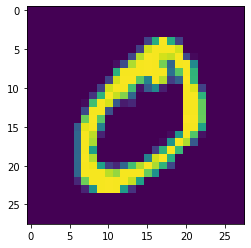

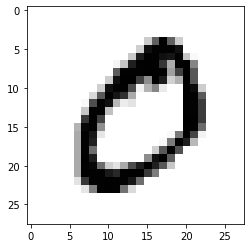

In [17]:
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1], cmap= plt.cm.binary)
plt.show()

#Checking Values of Each Pixel, Before Normalization

In [23]:
import numpy as np
np.set_printoptions(linewidth=np.inf)

In [24]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [26]:
print(x_test[1])
print(y_test[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

#Normalizing the Data | Pre-Processing Step

In [28]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

**Ater Normalizing, Checking for each Pixel values**

In [29]:
print(x_train[1])
print(x_test[1])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

#Resizing Image to make it suitable for applying Convolution Operation italicized text

In [30]:
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training Samples Dimension: ", x_train.shape)
print("Testing Samples Dimension: ", x_test.shape)

Training Samples Dimension:  (60000, 28, 28, 1)
Testing Samples Dimension:  (10000, 28, 28, 1)


#Creating A Deep Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [32]:
model = Sequential()

#First Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape =  x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Second Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape =  x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Third Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape =  x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected Layer2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer
model.add(Dense(10)) #Last Dense layer should be equal to number of unique outputs
model.add(Activation("softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [36]:
model.fit(x_train, y_train, epochs=10 , validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0427 - accuracy: 0.9860 - val_loss: 0.0564 - val_accuracy: 0.9826
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0615 - val_accuracy: 0.9826
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0579 - val_accuracy: 0.9838
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0198 - accuracy: 0.9931 - val_loss: 0.0594 - val_accuracy: 0.9852
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0699 - val_accuracy:

In [ ]:
# Accuracy ~= validation Accuracy 
# Accuracy > Validation. Accuracy => Overfitting Solution is Dropout a Layer

# Evaluating Neural Network Model

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss on 10,000 Test Samples: ", test_loss)
print("Accuracy on 10,000 Test Samples: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9832
Loss on 10,000 Test Samples:  0.07312668114900589
Accuracy on 10,000 Test Samples:  0.9832000136375427


In [38]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [40]:
print(predictions.shape)

(10000, 10)


In [41]:
print(predictions[0])
print(np.argmax(predictions[0]))

[1.6647234e-11 1.0917393e-08 1.1502958e-10 4.4648241e-10 2.6062505e-11 1.5203350e-10 2.0614837e-13 1.0000000e+00 1.1988237e-12 1.0895456e-10]
7


In [44]:
print(y_test[0])

7


In [45]:
print(predictions[10])
print(np.argmax(predictions[10]))
print(y_test[10])

[1.00000000e+00 6.04265427e-15 1.09718189e-11 2.24459390e-16 4.45544513e-12 1.07265325e-11 1.29782594e-08 3.19698677e-11 1.26851502e-10 1.44524686e-08]
0
0


In [46]:
import cv2 as cv

In [47]:
img = cv.imread('one.png')

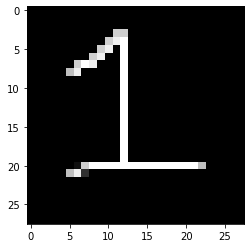

In [48]:
plt.imshow(img)

In [50]:
img.shape

(28, 28, 3)

In [49]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [51]:
gray.shape

(28, 28)

In [52]:
newimg = tf.keras.utils.normalize(gray, axis = 1)
newimgr = np.array(newimg).reshape(-1, 28, 28, 1)

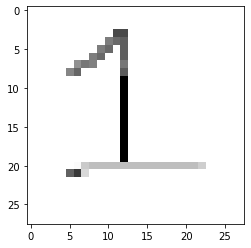

In [57]:
plt.imshow(newimg, cmap = plt.cm.binary)
plt.show()

In [58]:
print(newimg)

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [53]:
newimgr.shape

(1, 28, 28, 1)

In [54]:
predictTest = model.predict(newimgr)

1/1 [==============================] - 0s 71ms/step


In [55]:
print(predictTest)
print(np.argmax(predictTest))

[[3.4660413e-08 1.5446631e-04 1.2449140e-08 2.8194654e-14 1.8663540e-01 3.2013347e-07 2.7318701e-01 5.4463652e-11 5.4002273e-01 5.9027428e-08]]
8


In [59]:
img1 = cv.imread('two.png')

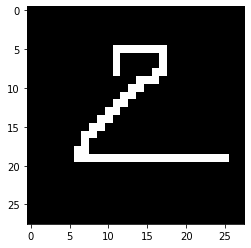

In [60]:
plt.imshow(img1)

In [67]:
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

In [68]:
newimg = tf.keras.utils.normalize(gray, axis = 1)
newimgr = np.array(newimg).reshape(-1, 28, 28, 1)

In [69]:
newimgr.shape

(1, 28, 28, 1)

In [70]:
predictTest = model.predict(newimgr)

1/1 [==============================] - 0s 21ms/step


In [71]:
print(predictTest[0])
print(np.argmax(predictTest[0]))

[1.6325497e-08 1.8086084e-07 9.9999094e-01 3.0841974e-08 2.8503402e-07 1.5759203e-09 1.2833412e-10 6.6570942e-07 7.8990543e-06 1.8873974e-08]
2
